In [2]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
y = np.random.normal(size=30).reshape(30, 1)
x = np.array(range(1, 31)).reshape(30, 1)
coord = np.concatenate((x, y), axis=1)

<AxesSubplot:>

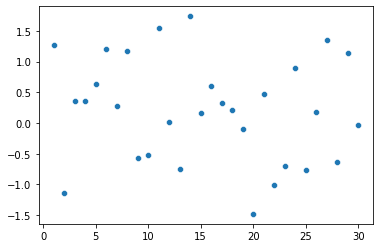

In [4]:
sns.scatterplot(x=x.reshape(1, 30)[0], y=y.reshape(1, 30)[0])

In [5]:
kl = int(input('Число кластеров: '))

Число кластеров: 3


In [ ]:
c = []
for i in range(kl):
    c.append(coord[random.randrange(coord.shape[0])])

while True:
    cluster = []
    for i in range(coord.shape[0]):
        d = {}
        for j in range(kl):
            a = ((coord[i][0] - c[j][0]) ** 2 + (coord[i][1] - c[j][1])) ** 0.5
            d[a] = j
            h = d[min(d)]
        cluster.append(c)
    df = pd.DataFrame({'x': coord[:, 0], 'y': coord[:, 1], 'cluster': cluster})
    
    new = []
    for i in range(kl):
        data = df[df['cluster'] == i]
        new.append(np.array([data['x'].mean(), data['y'].mean()]))
    
    new_cluster = []
    for i in range(coord.shape[0]):
        d = {}
        for j in range(kl):
            a = ((coord[i][0] - new[j][0]) ** 2 + (coord[i][1] - new[j][1])) ** 0.5
            d[a] = j
            c = d[min(d)]
        new.append(c)
    
    if cluster == new_cluster:
        break
    
    c = new

In [ ]:
df_2 = pd.DataFrame({'x': coord[:, 0], 'y': coord[:, 1], 'cluster': cluster})
df_2

In [ ]:
colors = ['red', 'yellow', 'green']

In [ ]:
for i in range(k):
    plt.scatter(data=df_2[df_2['cluster'] == i], x='x', y='y', color=colors[i])